In [88]:
%pylab inline
import math
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [89]:
def plot_regression(df, rows=1, models=None, factors=None):
    if models is None:
        models = sorted(set(df["model"]))
    if factors is None:
        all_factors = sorted(set(df["factor"]))
    else:
        all_factors = factors
    for mi, m in enumerate(models):
        dfm = df[df["model"] == m]
        low = min(dfm["beta"] - 4.0*dfm["se"])
        high = max(dfm["beta"] + 4.0*dfm["se"])
        most = max(high, -low)
        x = []
        y = []
        xerr = []
        xlab = []
        for i, factor in enumerate(all_factors):
            xlab.append(factor)
            y.append(-1 * i)
            try:
                dfmf = dfm[dfm["factor"] == factor]
                x.append(list(dfmf["beta"])[0])
                xerr.append(2.0 * list(dfmf["se"])[0])
            except IndexError:
                x.append(2.0*most) # Hide point outside chart
                xerr.append(0)
        subplot(rows, int(math.ceil(len(models) / float(rows))), 1+mi)
        plt.errorbar(x, y, xerr=xerr, fmt='o', markersize=4, capsize=4)
        plt.xlim([-most, most])
        plt.ylim([min(y) - 1, max(y) + 1])
        plt.title(m)
        # Add center spine
        ax = plt.gca()
        p = ax.spines['left'].get_path()
        s = matplotlib.spines.Spine.linear_spine(ax, "right")
        s.register_axis(ax.yaxis)
        s.set_position('zero')
        s.set_color('gray')
        ax.artists.append(s)
        # Wow, that was a lot of code
        if mi % int(math.ceil(len(models) / float(rows))) != 0:
            plt.yticks([], [])
        else:
            plt.yticks(y, all_factors)

In [90]:
df = pd.DataFrame.from_csv("analysis/regressions.csv", index_col=None)
sorted(set(df["factor"]))

['Article Count$^\\dagger$',
 'C-Efficiency$^\\dagger$',
 'Connectivity',
 'Editor Count$^\\dagger$',
 'First Assessment',
 'In-Degree Skewness$^\\dagger$',
 'Mean Article Age',
 'Mean Degree$^\\dagger$',
 'Mean Editors/Article$^\\dagger$',
 'Mean Path Length$^\\dagger$',
 'Out-Degree Skewness$^\\dagger$',
 'Revision Count$^\\dagger$']

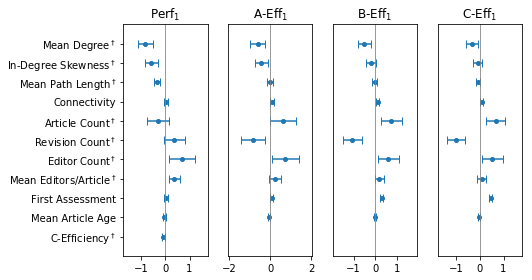

In [93]:
models = ["Perf$_1$", "A-Eff$_1$", "B-Eff$_1$", "C-Eff$_1$"]
factors = [
 'Mean Degree$^\\dagger$',
 'In-Degree Skewness$^\\dagger$',
 'Mean Path Length$^\\dagger$',
 'Connectivity',
 'Article Count$^\\dagger$',
 'Revision Count$^\\dagger$',
 'Editor Count$^\\dagger$',
 'Mean Editors/Article$^\\dagger$',
 'First Assessment',
 'Mean Article Age',
 'C-Efficiency$^\\dagger$']
f = plt.figure(figsize=(7.5,4))
plot_regression(df, models=models, factors=factors)
plt.tight_layout()
plt.savefig("regression.png", format="png", dpi=300)